# Tweet Sentiment Analysis
The nweets were colected by a secprate script , and this notebook contains analysis of it


---



## 1. Imports ana initialization 

In [1]:
#This is mounting google drve, location for my data file. Datafile not included in here because of its size, so please attach datafile from any location as needed
#It has been shared in aggle as public dataset
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
#db = sqlite3.connect('/content/drive/My Drive/Academics/0002. Spring 2020/CS 6830 Data Science/Final Project/Final Project To Submit/updatedTweets.db')

db = sqlite3.connect('pathToTheDatabaseFile.db')
df = pd.read_sql_query("SELECT id, user_description, user_location, coordinates, text, user_name, user_created, user_followers, id_str, created, user_bg_color,polarity, subjectivity, nltkSent FROM tweets", db)


## 2. Next few cells are hidden and commented because nltk sentiment is now added to the db file, and df fine updated. No need to run these cells

In [0]:
# newCols = ['id', 'user_description', 'user_location', 'coordinates', 'text', 'user_name', 'user_created', 'user_followers', 'id_str', 'created', 'user_bg_color','polarity', 'subjectivity','nltkSent']
# df = df.reindex(columns = newCols)
# df.head(3)

,id,user_description,user_location,coordinates,text,user_name,user_created,user_followers,id_str,created,user_bg_color,polarity,subjectivity,nltkSent
0,1,Changing the world by helping people own thems...,"Wentzville, MO",None,RT @poetWOAgun: Sabotage or an Accident?,MyPowerDrive,2012-06-02 20:58:16.000000,106,1252290783350272001,2020-04-20 17:39:23.000000,569FD2,0.0,0.0,-0.7579
1,2,None,None,None,RT @Jali_Cat: Christians try to gather for wor...,SportsfanThomas,2015-05-29 19:40:38.000000,761,1252290783425765377,2020-04-20 17:39:23.000000,C0DEED,0.0,0.0,-0.3612
2,3,"Love my family, America and Harley Davidsons. ...",None,None,RT @Kingfreespeech: The Corona Virus has “over...,ElHefeGarcia,2011-08-22 04:42:45.000000,525,1252290783585071104,2020-04-20 17:39:23.000000,C0DEED,0.2,0.2,0.4019


In [0]:
# import nltk
# nltk.download('vader_lexicon')
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# sid = SentimentIntensityAnalyzer()

In [0]:
# df['nltkSent'] = df['text']


In [0]:
# for i in range (0,len(df)):
#   df.at[i, 'nltkSent'] = sid.polarity_scores(df.at[i,'text'])['compound']
# df.head()
# df['nltkSent'] = sid.polarity_scores(df['text'].str)

In [0]:
# from sqlalchemy import create_engine

# disk_engine = create_engine('sqlite:///updatedTweets.db')
# df.to_sql('tweets', disk_engine, if_exists='append')

KeyboardInterrupt: ignored

## 3. Preprocessing text and cleanups

In [3]:
df.head()
df['text'] = df['text'].str.lower()
df['user_name'] = df['text'].str.lower() 

,id,user_description,user_location,coordinates,text,user_name,user_created,user_followers,id_str,created,user_bg_color,polarity,subjectivity,nltkSent
0,1,Changing the world by helping people own thems...,"Wentzville, MO",None,RT @poetWOAgun: Sabotage or an Accident?,MyPowerDrive,2012-06-02 20:58:16.000000,106,1252290783350272001,2020-04-20 17:39:23.000000,569FD2,0.000000,0.000000,-0.7579
1,2,None,None,None,RT @Jali_Cat: Christians try to gather for wor...,SportsfanThomas,2015-05-29 19:40:38.000000,761,1252290783425765377,2020-04-20 17:39:23.000000,C0DEED,0.000000,0.000000,-0.3612
2,3,"Love my family, America and Harley Davidsons. ...",None,None,RT @Kingfreespeech: The Corona Virus has “over...,ElHefeGarcia,2011-08-22 04:42:45.000000,525,1252290783585071104,2020-04-20 17:39:23.000000,C0DEED,0.200000,0.200000,0.4019
3,4,Development worker | CNF writer | Freelance wi...,Philippines,None,RT @loren_legarda: I want a full blown investi...,IAmArnelMurga,2012-08-18 03:13:35.000000,385,1252290783652139008,2020-04-20 17:39:23.000000,EBF2F5,0.061111,0.238889,0.0772
4,5,Medico💊💉,None,None,સમય સમયની વાત છે દોસ્ત \nએક સમય એવો હતો કે *અમ...,JayeshA57633605,2019-11-02 06:49:59.000000,10,1252290783467769859,2020-04-20 17:39:23.000000,F5F8FA,0.000000,0.000000,0.0000


In [0]:
len(df)

4296653

In [0]:
df['created']= pd.to_datetime(df['created'], errors='coerce') 
df['created'] = df['created'].dt.tz_localize('GMT').dt.tz_convert('US/Mountain')
df['HourMin'] = df['created'].dt.strftime('%H:%M')
df['Hour'] = df['created'].dt.strftime('%H')

In [0]:

potus = df[(df.text.str.contains('trump | potus | president | whitehouse '))] 
potus.head(10)

,id,user_description,user_location,coordinates,text,user_name,user_created,user_followers,id_str,created,user_bg_color,polarity,subjectivity,nltkSent,HourMin,Hour
48,49,Legislative @MichiganHHS. Medley of interests:...,America’s High Five,None,"rt @ronbrownstein: in mi, trump approve on vir...","rt @ronbrownstein: in mi, trump approve on vir...",2009-08-18 20:04:24.000000,1230,1252290785510330370,2020-04-20 11:39:24-06:00,131516,-0.120,0.380,0.0000,11:39,11
53,54,"I’m a New Yorker, enough said! #nyc","New York, NY",None,rt @glennwsmith: this is a photo of president ...,rt @glennwsmith: this is a photo of president ...,2009-04-26 10:58:05.000000,298,1252290786747650051,2020-04-20 11:39:24-06:00,080800,0.000,0.000,0.1779,11:39,11
63,64,"I do the research, marketing, negotiating, and...","San Antonio, Texas",None,rt @teapainusa: this is at least the third cor...,rt @teapainusa: this is at least the third cor...,2010-02-03 23:49:56.000000,271,1252290787313889280,2020-04-20 11:39:24-06:00,FCEBB6,-0.100,0.300,0.0000,11:39,11
67,68,Being me,None,None,rt @donaldjtrumpjr: it’s strange that in almos...,rt @donaldjtrumpjr: it’s strange that in almos...,2009-10-24 17:09:10.000000,44,1252290787439710208,2020-04-20 11:39:24-06:00,C0DEED,-0.025,0.575,0.1154,11:39,11
89,90,"China Lied, People Died\nFuck the CCP & their ...",MAGA Country,None,@dcexaminer @joenbc @realdonaldtrump the pande...,@dcexaminer @joenbc @realdonaldtrump the pande...,2009-07-21 00:13:13.000000,1065,1252290788198879236,2020-04-20 11:39:25-06:00,000000,0.000,0.000,0.0000,11:39,11
100,101,#StayAtHome #FlattenTheCurve\n#Covid19 #MeToo ...,"Semarang, Indonesia",None,rt @glennwsmith: this is a photo of president ...,rt @glennwsmith: this is a photo of president ...,2011-12-29 09:02:56.000000,854,1252290791113805826,2020-04-20 11:39:25-06:00,C0DEED,0.000,0.000,0.1779,11:39,11
209,210,None,None,None,rt @donaldjtrumpjr: it’s strange that in almos...,rt @donaldjtrumpjr: it’s strange that in almos...,2017-02-05 19:13:10.000000,101,1252290800035168257,2020-04-20 11:39:27-06:00,F5F8FA,-0.025,0.575,0.1154,11:39,11
223,224,Native (First Nations)~Sun Seeker~Professional...,"Florida, Toronto, Jamaica",None,rt @nowthisnews: if trump acted 2 weeks sooner...,rt @nowthisnews: if trump acted 2 weeks sooner...,2017-03-17 04:52:54.000000,5168,1252290800630861826,2020-04-20 11:39:27-06:00,000000,0.000,0.000,0.0258,11:39,11
226,227,"🏈🏒⚾🏀 NYG, NYR, NYY, NYK. proudly BLUE!\n USED ...","Winter Garden, FL",None,government watchdog preparing ‘blizzard of aud...,government watchdog preparing ‘blizzard of aud...,2020-01-21 06:41:16.000000,148,1252290800601444353,2020-04-20 11:39:27-06:00,F5F8FA,0.000,0.000,-0.5574,11:39,11
255,256,University of Arizona & Pima college grad. US ...,"Tucson, AZ",None,rt @joncoopertweets: trump lagged on coronavir...,rt @joncoopertweets: trump lagged on coronavir...,2019-05-04 06:07:45.000000,192,1252290803809959937,2020-04-20 11:39:28-06:00,F5F8FA,0.000,0.000,-0.0803,11:39,11


## 4. Tweets by selected subject

In [0]:
joe = df[(df.text.str.contains('biden', regex=True))] 
cnn = df[(df.text.str.contains('cnn', regex=True))] 
fox = df[(df.text.str.contains('fox', regex=True))] 
fauci = df[(df.text.str.contains('fauci', regex=True))]
econ = df[(df.text.str.contains('economy|job | employment | rent | recession | bill | mortgage ', regex=True))]
rep = df[(df.text.str.contains('republican',regex=True))]
dem = df[(df.text.str.contains('dems | democrat | dnc',regex=True))]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[]

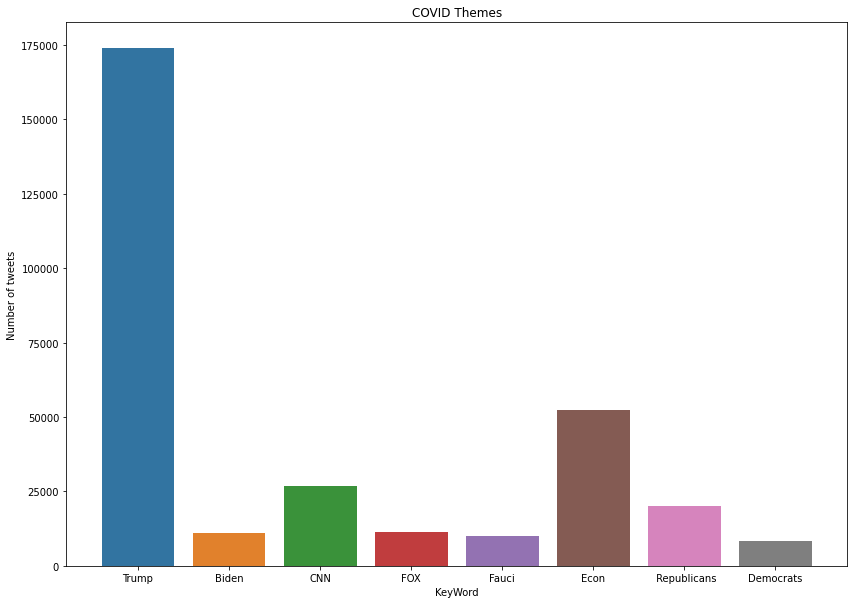

In [0]:
import seaborn as sns
# df["binned_mins"] = pd.cut(df.created.dt.minute, bins=100)
plt.figure(figsize=(14,10))
a = (len(potus))
b = (len(joe))
c = (len(cnn))
d = (len(fox))
e = (len(fauci))
f = (len(econ))
g = (len(rep))
h = (len(dem))
numTweets = [a,b,c,d,e,f,g,h]
names = ['Trump', 'Biden', 'CNN', 'FOX', 'Fauci','Econ',' Republicans',"Democrats"]
ax = sns.barplot(y=numTweets, x=names)
ax.set_title('COVID Themes')
ax.set_ylabel('Number of tweets')
ax.set_xlabel('KeyWord')
ax.plot()


In [0]:
dfs=[potus,joe,cnn,fox,fauci,econ,rep,dem]
for d in dfs:
    print(len(d))

173901
11113
26914
11344
9870
52456
20134
8435


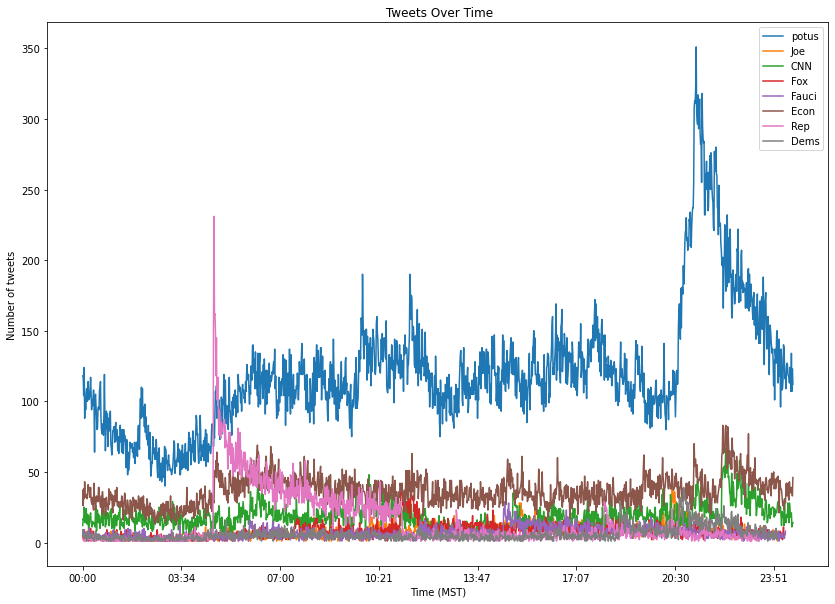

In [0]:
plt.figure(figsize=(14,10))

for d in dfs:
    line = pd.value_counts(d['HourMin']).sort_index().plot.line()
    line.set_title(' Tweets Over Time')
    line.set_ylabel('Number of tweets')
    line.set_xlabel('Time (MST)')
plt.legend(['potus', 'Joe','CNN', 'Fox','Fauci','Econ','Rep','Dems'])
#     htsLine.plot(figsize=(10,20))

## 5. Sentiment by those selected subjects


In [0]:
# cols = ['subject','blobPos','blobNeg', 'blobNet', 'nltkNet']
# netSentdf = pd.DataFrame(columns=cols)
# netSentdf

In [0]:
# print(len(potus[(potus.polarity > 0)]))
varName = ['potus', 'Joe','CNN', 'Fox','Fauci','Econ','Rep','Dems']
cols = ['subject','blobPos','blobNeg', 'blobNet']
netSentdf = pd.DataFrame(columns=cols)
varNameIndex=0
for d in dfs:
    total = len(d)
    pos= len(d[(d.polarity > 0)])
    neg = len(d[(d.polarity < 0)])
    posPercent = pos/total*100
    negPercent = neg/total * 100
    netPos = posPercent - negPercent
    print(varName[varNameIndex]," --> Positive: ","{:.2f}".format(posPercent),"Negative: ", "{:.2f}".format(negPercent), "Net: ","{:.2f}".format(netPos))
    netSentdf.loc[varNameIndex] = ((varName[varNameIndex]), (posPercent), (negPercent), (netPos) )
    varNameIndex += 1
netSentdf

potus  --> Positive:  25.98 Negative:  28.60 Net:  -2.62
Joe  --> Positive:  38.61 Negative:  21.74 Net:  16.87
CNN  --> Positive:  20.99 Negative:  15.90 Net:  5.09
Fox  --> Positive:  37.58 Negative:  17.65 Net:  19.93
Fauci  --> Positive:  46.35 Negative:  15.44 Net:  30.91
Econ  --> Positive:  37.16 Negative:  18.53 Net:  18.63
Rep  --> Positive:  78.98 Negative:  6.63 Net:  72.36
Dems  --> Positive:  61.13 Negative:  17.40 Net:  43.72


,subject,blobPos,blobNeg,blobNet
0,potus,25.979724,28.601906,-2.622182
1,Joe,38.612436,21.740304,16.872132
2,CNN,20.985361,15.898789,5.086572
3,Fox,37.579337,17.648096,19.931241
4,Fauci,46.352584,15.440729,30.911854
5,Econ,37.158762,18.533628,18.625133
6,Rep,78.980828,6.625608,72.355220
7,Dems,61.126260,17.403675,43.722584


In [0]:
## Using NLTK Value:


varName = ['potus', 'Joe','CNN', 'Fox','Fauci','Econ','Rep','Dems']
varNameIndex=0
print('USING NLTK Sentiment analysis')
for d in dfs:
    total = len(d)
    pos= len(d[(d.nltkSent > 0)])
    neg = len(d[(d.nltkSent < 0)])
    posPercent = pos/total*100
    negPercent = neg/total * 100
    netPos = posPercent - negPercent
    print(varName[varNameIndex]," --> Positive: ","{:.2f}".format(posPercent),"Negative: ", "{:.2f}".format(negPercent), "Net: ","{:.2f}".format(netPos))
    netSentdf.at[varNameIndex,'nltkPos'] = posPercent
    netSentdf.at[varNameIndex,'nltkNeg'] = negPercent
    netSentdf.at[varNameIndex,'nltkNet'] = netPos

    varNameIndex += 1
netSentdf 

USING NLTK Sentiment analysis
potus  --> Positive:  28.97 Negative:  40.73 Net:  -11.76
Joe  --> Positive:  38.45 Negative:  34.43 Net:  4.02
CNN  --> Positive:  23.59 Negative:  28.93 Net:  -5.34
Fox  --> Positive:  26.60 Negative:  36.65 Net:  -10.06
Fauci  --> Positive:  11.17 Negative:  68.68 Net:  -57.52
Econ  --> Positive:  34.44 Negative:  35.48 Net:  -1.04
Rep  --> Positive:  70.03 Negative:  13.01 Net:  57.01
Dems  --> Positive:  39.21 Negative:  26.69 Net:  12.52


,subject,blobPos,blobNeg,blobNet,nltkPos,nltkNeg,nltkNet
0,potus,25.979724,28.601906,-2.622182,28.967631,40.726045,-11.758414
1,Joe,38.612436,21.740304,16.872132,38.450463,34.428147,4.022316
2,CNN,20.985361,15.898789,5.086572,23.589953,28.929182,-5.339229
3,Fox,37.579337,17.648096,19.931241,26.595557,36.653738,-10.058181
4,Fauci,46.352584,15.440729,30.911854,11.165147,68.682877,-57.517730
5,Econ,37.158762,18.533628,18.625133,34.442199,35.483072,-1.040872
6,Rep,78.980828,6.625608,72.355220,70.025827,13.012814,57.013013
7,Dems,61.126260,17.403675,43.722584,39.205691,26.686426,12.519265


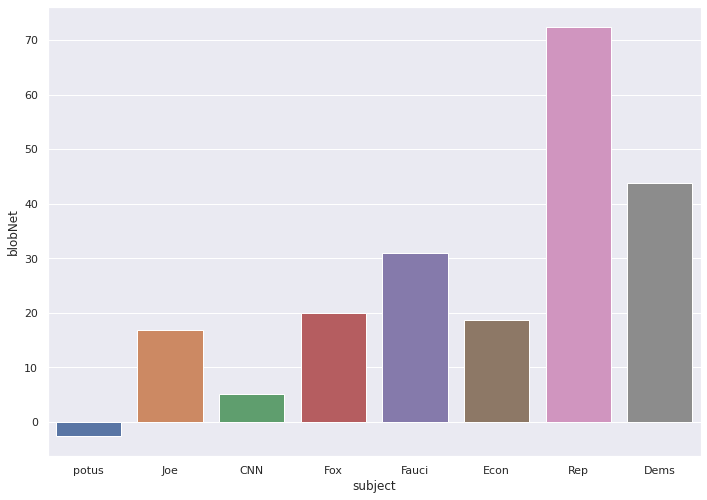

In [0]:

#Sentiment  Using Blob
import seaborn as sns
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="subject", y="blobNet", data=netSentdf)


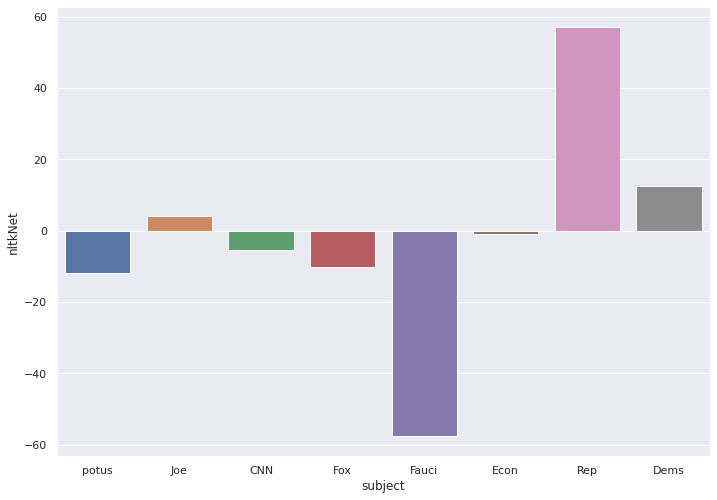

In [0]:
#Sentiment  Using NLTK Vadar
import seaborn as sns
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="subject", y="nltkNet", data=netSentdf)

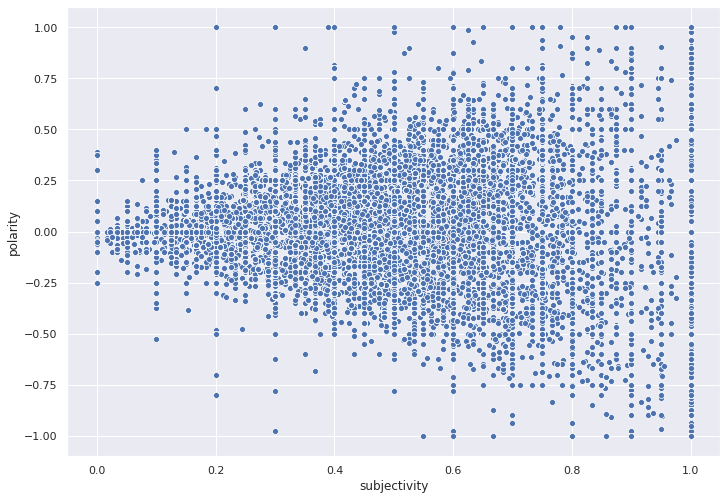

In [0]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(x='subjectivity',y='polarity', data=potus)

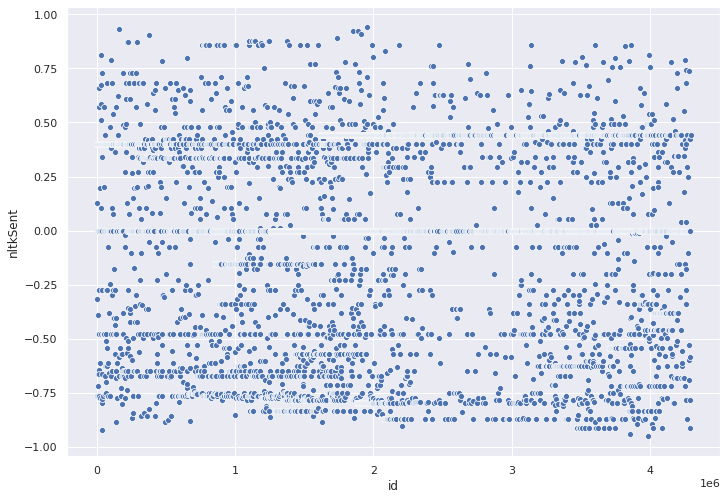

In [0]:
import seaborn as sns; 
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(x='id',y='nltkSent', data=dem)

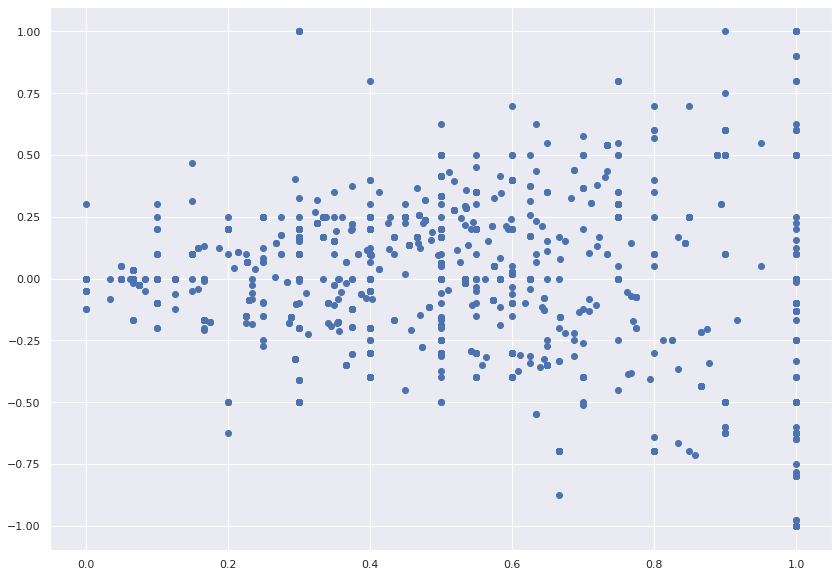

In [0]:
plt.figure(figsize=(14,10))
plt.scatter(fauci.subjectivity,fauci.polarity )

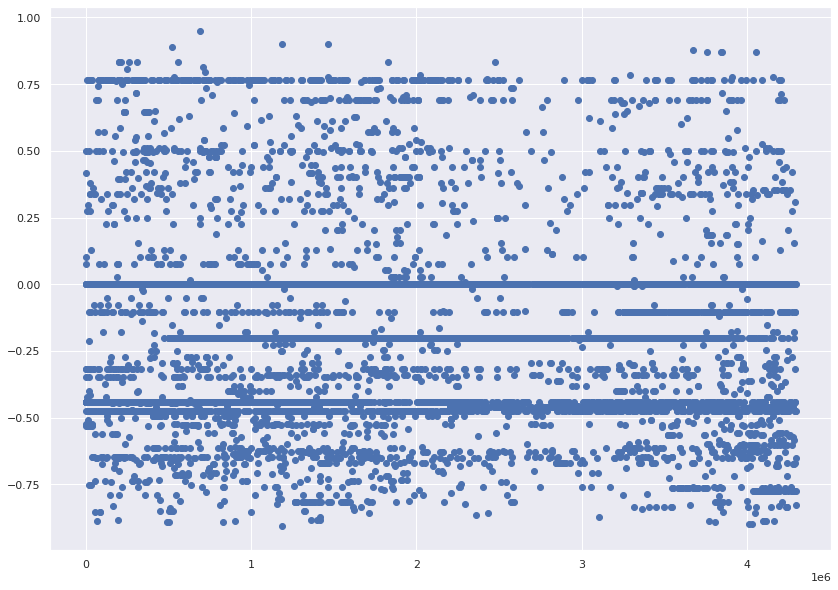

In [0]:
plt.figure(figsize=(14,10))
plt.scatter(fauci.index,fauci.nltkSent )

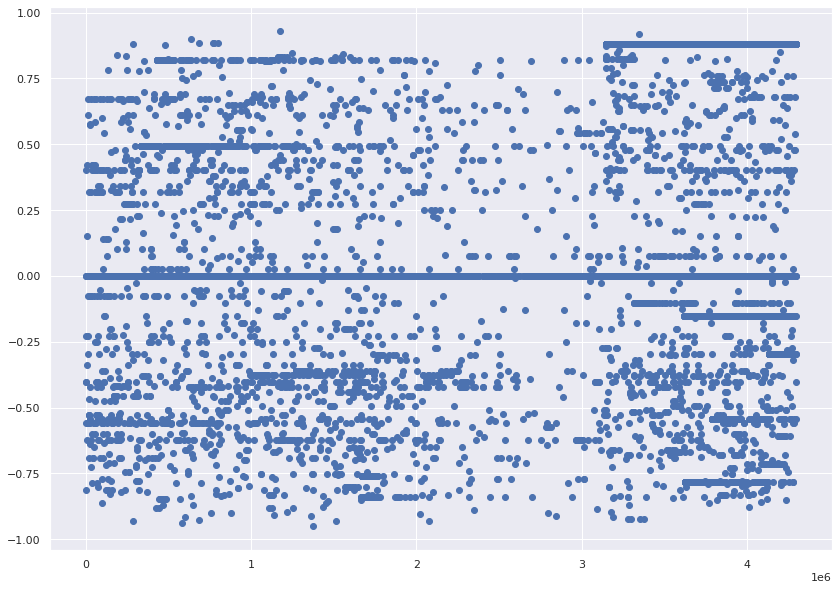

In [0]:
plt.figure(figsize=(14,10))
plt.scatter(rep.index,rep.nltkSent )

In [0]:
# print(len(potus[(potus.polarity > 0)]))
varName = ['potus', 'Joe','CNN', 'Fox','Fauci','Econ','Rep','Dems']
varNameIndex=0
for d in dfs:
    total = len(d)
    pos= len(d[(d.subjectivity >= 0.5)])
    neg = len(d[(d.subjectivity < 0.5)])
    posPercent = pos/total*100
    negPercent = neg/total * 100
#     netPos = posPercent - negPercent
    print(varName[varNameIndex]," --> Subjective: ","{:.2f}".format(posPercent),"Objective: ", "{:.2f}".format(negPercent))
    varNameIndex += 1

potus  --> Subjective:  29.69 Objective:  70.31
Joe  --> Subjective:  47.57 Objective:  52.43
CNN  --> Subjective:  15.91 Objective:  84.09
Fox  --> Subjective:  31.44 Objective:  68.56
Fauci  --> Subjective:  23.62 Objective:  76.38
Econ  --> Subjective:  29.64 Objective:  70.36
Rep  --> Subjective:  72.58 Objective:  27.42
Dems  --> Subjective:  17.83 Objective:  82.17


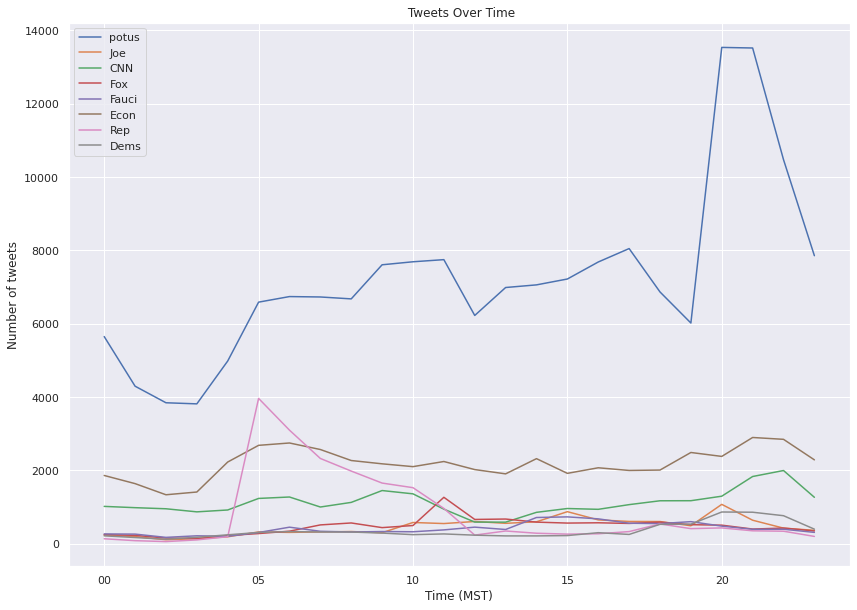

In [0]:
#For Tweets by Time of the Day (in Mountain Time)
plt.figure(figsize=(14,10))

for d in dfs:
    line = pd.value_counts(d['Hour']).sort_index().plot.line()
    line.set_title(' Tweets Over Time')
    line.set_ylabel('Number of tweets')
    line.set_xlabel('Time (MST)')
plt.legend(['potus', 'Joe','CNN', 'Fox','Fauci','Econ','Rep','Dems'])
#     htsLine.plot(figsize=(10,20))

### ^^ This will work once we have tweets spanning 24 hrs 

In [0]:
df['id_str'].value_counts()
nAndMore=df['id_str'].value_counts()>= 4
# df['MorethanNTweets']=(df['id_str'].value_counts()>= 3)
# df.head()

### This block ^^ Will be used to analyze frequently tweeting people 
update: No signficant nuber of tweets from same account, statistically *insignificant*

## 6. Sentiment by Location

In [0]:
gaLoc = df[((df.user_location == 'GA') | (df.user_location == 'Georgia') | (df.user_location == 'Atlanta') | (df.user_location == 'Savannah'))] 
utLoc = df[((df.user_location == 'Utah') | (df.user_location == 'Salt Lake City') | (df.user_location == 'UT') | (df.user_location == 'Salt Lake') | (df.user_location == 'SLC') )] 
nyLoc = df[((df.user_location == 'NYC') | (df.user_location == 'New York') | (df.user_location == 'NY') | (df.user_location == 'New York City') | (df.user_location == 'SLC') )] 
caLoc = df[((df.user_location == 'CA') | (df.user_location == 'California') | (df.user_location == 'Los Angeles') | (df.user_location == 'San Francisco'))] 
idLoc = df[((df.user_location == 'Idaho') | (df.user_location == 'idaho') | (df.user_location == 'Boise') | (df.user_location == 'ID'))] 
waLoc = df[((df.user_location == 'Washington') | (df.user_location == 'WA') | (df.user_location == 'Seattle') )] 

In [0]:
locdfs = [df,utLoc, idLoc, gaLoc, nyLoc,caLoc,waLoc]
locations = ['All','UT','ID', 'GA','NYC',"CA",'WA']
cols = ['Locations','blobPos','blobNeg', 'blobNet','nltkPos',	'nltkNeg',	'nltkNet']
netLocSentdf = pd.DataFrame(columns=cols)
varNameIndex=0
for d in locdfs:
    total = len(d)
    pos= len(d[(d.polarity > 0)])
    neg = len(d[(d.polarity < 0)])
    print(neg)
    posPercent = pos/total*100
    negPercent = neg/total * 100
    netPos = posPercent - negPercent
    # print(locations[varNameIndex]," --> Positive: ","{:.2f}".format(posPercent),"Negative: ", "{:.2f}".format(negPercent), "Net: ","{:.2f}".format(netPos))

    nltkpos= len(d[(d.nltkSent > 0)])
    nltkneg = len(d[(d.nltkSent < 0)])
    print(nltkpos, nltkneg)
    nltkposPercent = nltkpos/total*100
    nltknegPercent = nltkneg/total * 100
    nltknetPos = nltkposPercent - nltknegPercent
    # print(locations[varNameIndex]," --> Positive: ","{:.2f}".format(nltkposPercent),"Negative: ", "{:.2f}".format(nltknegPercent), "Net: ","{:.2f}".format(nltknetPos))


    netLocSentdf.loc[varNameIndex] = ((locations[varNameIndex]), (posPercent), (negPercent), (netPos), nltkposPercent, nltknegPercent, nltknetPos)
    varNameIndex += 1
netLocSentdf

540966
936128 1186083
86
153 153
43
64 72
385
586 664
1949
3221 3841
1744
2716 3239
284
513 522


,Locations,blobPos,blobNeg,blobNet,nltkPos,nltkNeg,nltkNet
0,All,24.184499,12.590405,11.594094,21.787377,27.604812,-5.817435
1,UT,37.557604,19.815668,17.741935,35.253456,35.253456,0.000000
2,ID,34.080717,19.282511,14.798206,28.699552,32.286996,-3.587444
3,GA,37.275607,20.327350,16.948258,30.939810,35.058078,-4.118268
4,NYC,37.331642,19.022057,18.309584,31.436658,37.487800,-6.051142
5,CA,38.202514,20.678207,17.524306,32.202988,38.404079,-6.201091
6,WA,39.891452,19.267300,20.624152,34.803256,35.413840,-0.610583


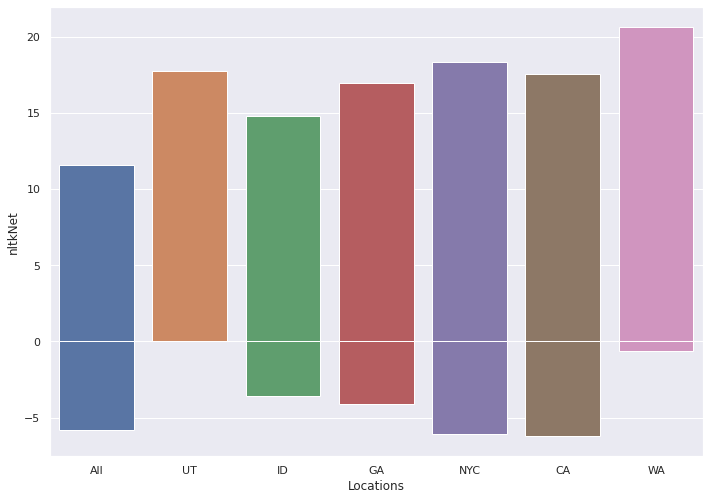

In [0]:
#Sentiment  Using Blob
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="Locations", y="blobNet", data=netLocSentdf)
ax2 = sns.barplot(x="Locations", y="nltkNet", data=netLocSentdf)

### Making Wordcloud for all tweets

In [0]:
allTextCol = (df.text)
bagofText = ''

In [0]:
for i in range (0,len(allTextCol)):
  bagofText = bagofText + ' ' +  allTextCol[i]

KeyboardInterrupt: ignored

In [0]:
 from wordcloud import WordCloud

wordcloud = WordCloud(max_words=100, width=1200, height = 800 ).generate(bagofText)
plt.figure(figsize = (18, 12))
# Display the generated image:
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()